**Welcome to your first assignment of Summer Analytics 2023! We hope you are excited to implement and test everything you have learnt up until now.<a href = "https://drive.google.com/file/d/1U73P58VAc4EXM98Or9feKnVx9I9FOP_L/view?usp=sharing"> The dataset</a> which you'll use includes information about Movies.**

 We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!
 
Let's get started with importing numpy, pandas, seaborn and matplotlib! 

Note - matplotlib should be imported with the command :

**import matplotlib.pyplot as plt**

Start by importing all important libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

Read the csv file and assign it to a variable .

In [37]:
df = pd.read_csv('/content/drive/MyDrive/imdb_top_1000 (1).csv')

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Display shape of dataframe

In [39]:
df.shape

(1000, 16)

Print all columns of dataframe

In [40]:
print(df.columns)

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


Remove the column 'Poster_Link' and update the dataframe.

In [41]:
df = df.drop('Poster_Link', axis=1)

Set the 'Series_Title' column as the index of dataframe

In [9]:
df = df.set_index('Series_Title')

Print a list of all the unique Genre

In [63]:
a=df['Genre'] 
import re 
res = [re.split(', ', s) for s in a] 
 
a=[] 
for x in res: 
  for z in x: 
    a.append(z) 
   
np.unique(a)

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'], dtype='<U9')

1. What is the Number of Directors in the given dataset ? 

In [43]:
num_directors = df['Director'].nunique()
print(num_directors)

548


2. What is the mean, median and standard deviation of IMDB rating in the dataset ?

In [44]:
# Calculate the mean IMDb rating
mean_rating = df['IMDB_Rating'].mean()

# Calculate the median IMDb rating
median_rating = df['IMDB_Rating'].median()

# Calculate the standard deviation of IMDb ratings
std_rating = df['IMDB_Rating'].std()

# Print the results
print("Mean rating:", mean_rating)
print("Median rating:", median_rating)
print("Standard deviation:", std_rating)

Mean rating: 7.949299999999999
Median rating: 7.9
Standard deviation: 0.2754912074920095


3. Which director has directed the most number of movies?

In [45]:
director_counts = df['Director'].value_counts()
most_common_director = director_counts.idxmax()
print("Director with the most movies:", most_common_director)

Director with the most movies: Alfred Hitchcock


4. Name the Movie which has the highest Runtime ?

In [46]:
max_runtime = df['Runtime'].max()
max_runtime_movie = df[df['Runtime'] == max_runtime]['Series_Title'].values[0]

print("Movie with the highest runtime:", max_runtime_movie)

Movie with the highest runtime: Reservoir Dogs


5. How many movies are released after year 2000 and have IMDB rating > 8.5 ?

In [48]:
filtered_df = df[(df['Released_Year'] > '2000') & (df['IMDB_Rating'] > 8.5)]
num_movies = filtered_df.shape[0]
print("Number of movies released after 2000 with IMDb rating > 8.5:", num_movies)

Number of movies released after 2000 with IMDb rating > 8.5: 11


Using seaborn make different types of plots, observe the trend and answer the questions.
6. Make a countplot of Movies directed by top 5 directors.

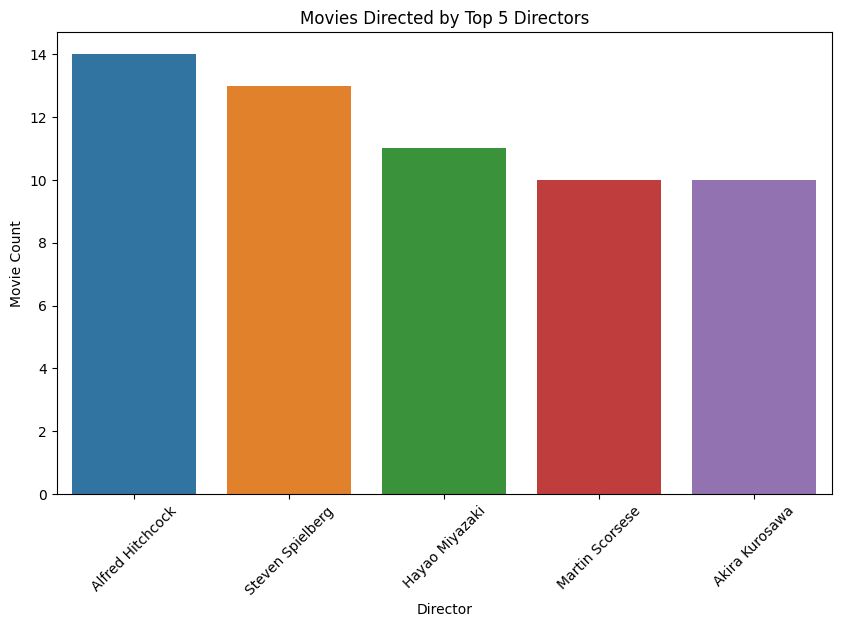

In [49]:
director_counts = df['Director'].value_counts()

# Get the top 5 directors
top_directors = director_counts.head(5)

# Create a DataFrame for the top 5 directors and their movie counts
top_directors_df = pd.DataFrame({'Director': top_directors.index, 'Movie Count': top_directors.values})

# Create the countplot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_directors_df, x='Director', y='Movie Count')
plt.title('Movies Directed by Top 5 Directors')
plt.xlabel('Director')
plt.ylabel('Movie Count')
plt.xticks(rotation=45)
plt.show()

7. Make a plot to analyze distribution of IMDB rating?

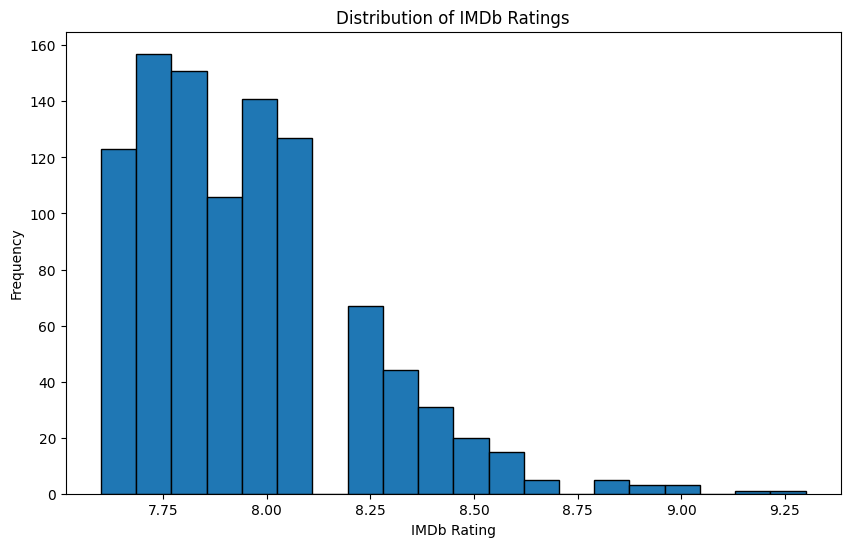

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(df['IMDB_Rating'], bins=20, edgecolor='black')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

8. What type of Genre has the highest IMDB rating?

In [51]:
genre_ratings = df.groupby('Genre')['IMDB_Rating'].mean()

# Find the genre with the highest average IMDb rating
highest_rated_genre = genre_ratings.idxmax()
print("Genre with the highest IMDb rating:", highest_rated_genre)

Genre with the highest IMDb rating: Animation, Drama, War


9. Name the top 5 movies that have earned highest Meta score. 

In [52]:
sorted_df = df.sort_values(by='Meta_score', ascending=False)

# Select the top 5 movies with the highest Metascores
top_5_movies = sorted_df.head(5)['Series_Title'].tolist()

print("Top 5 movies with highest Metascores:")
for movie in top_5_movies:
    print(movie)

Top 5 movies with highest Metascores:
Sweet Smell of Success
Rear Window
Casablanca
Trois couleurs: Rouge
Notorious


10. Of which Genre movie has the highest Runtime?

In [53]:
max_runtime = df['Runtime'].max()

max_runtime_movies = df[df['Runtime'] == max_runtime]
genre_of_max_runtime = max_runtime_movies['Genre'].values

print("Genre(s) of the movie(s) with the highest runtime:")
for genre in genre_of_max_runtime:
    print(genre)

Genre(s) of the movie(s) with the highest runtime:
Crime, Drama, Thriller
Drama, Music
Comedy, War
Adventure, Comedy, Crime
Drama, Mystery, Romance
Crime, Drama
Comedy, Drama, Romance
Action, Drama, Western
Comedy, Horror
Animation, Drama, Fantasy
Action, Comedy, Fantasy
Comedy, Crime, Drama
Comedy, Crime
Crime, Drama, Thriller


**Using the knowledge about Plotly that you have  try making plots and analyse the data .Whenever you come across an interesting analysis please show the corresponding plot(using Plotly) and comment down your analysis for the same**

In [54]:
#Distribution of IMDb Ratings
fig = px.histogram(df, x='IMDB_Rating', nbins=20, title='Distribution of IMDb Ratings')
fig.show()

In [55]:
#IMDb Rating vs. Runtime
fig = px.scatter(df, x='Runtime', y='IMDB_Rating', title='IMDb Rating vs. Runtime')
fig.show()

In [56]:
#Top 5 Genres by Movie Count
top_genre_counts = df['Genre'].value_counts().nlargest(5)

fig = px.bar(top_genre_counts, x=top_genre_counts.index, y=top_genre_counts.values,
             title='Top 5 Genres by Movie Count')
fig.update_xaxes(title='Genre')
fig.update_yaxes(title='Movie Count')
fig.show()